In [68]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
df=pd.DataFrame([[2,1],[3,5],[4,3],[5,6],[6,7],[7,8]], columns=['x1', 'x2'])

In [71]:
df

,x1,x2
0,2,1
1,3,5
2,4,3
3,5,6
4,6,7
5,7,8


In [73]:
df_test = pd.DataFrame([[0,0], [2,1],[3,5],[4,3],[5,6],[6,7],[7,8]], columns=['x1', 'x2'])

In [74]:
x_test = df_test.x1.reshape((7,1))
x_test

array([[0],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [40]:
#Fit a line to above points using linear regression
lr = LinearRegression()
x = df.x1.values.reshape((6,1))
y = df.x2.reshape((6,1))
lr.fit(x, y)

In [58]:
lr.coef_[0]

array([ 1.25714286])

In [91]:
print ('Coefficients: \n', lr.coef_)
print ('Intercept: \n', lr.intercept_)

('Coefficients: \n', array([[ 1.25714286]]))
('Intercept: \n', array([-0.65714286]))


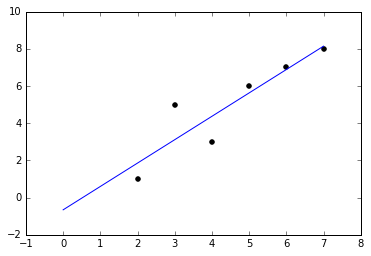

In [75]:
plt.scatter(x, y, color='black')
plt.plot(x_test, lr.predict(x_test), color='blue')

In [92]:
#See what the principal component values and vectors are

In [93]:
from sklearn.decomposition import PCA

In [95]:
X_array = np.array([[2,1],[3,5],[4,3],[5,6],[6,7],[7,8]])

In [96]:
pca = PCA(n_components=2)

In [98]:
pca.fit(X_array)

PCA(copy=True, n_components=2, whiten=False)

In [99]:
print(pca.explained_variance_ratio_)

[ 0.95623321  0.04376679]


In [100]:
pca.get_covariance()

array([[ 2.91666667,  3.66666667],
       [ 3.66666667,  5.66666667]])

In [178]:
pca.components_

array([[ 0.56959484,  0.82192562],
       [ 0.82192562, -0.56959484]])

In [179]:
pca.mean_

array([ 4.5,  5. ])

In [ ]:
pca.

In [176]:
#Compute Variance matrix manually

def mean_matrix(xarray):
    #First compute mean
    x1_mean = 0.0
    x2_mean = 0.0
    for i in range(len(xarray)):
        x1_mean += xarray[i][0]
        x2_mean += xarray[i][1]
    
    x1_mean = float(x1_mean)/len(xarray)
    x2_mean = float(x2_mean)/len(xarray)
    return [x1_mean, x2_mean]

def cov_mat(xarray):
    ma = mean_matrix(xarray)
    xmm = xarray - ma
    
    m = np.array([[0.0,0.0],[0.0,0.0]])
    for i in range(len(xmm)):
        m += np.matmul(xmm[i].reshape(2,1), xmm[i].reshape(1,2))
    return m/len(xmm)

In [177]:
cov_mat(X_array)

array([[ 2.91666667,  3.66666667],
       [ 3.66666667,  5.66666667]])

In [182]:
#overlay PCA-1 with actual line
pca.components_[0]

array([ 0.56959484,  0.82192562])

In [195]:
pca_line = []
for i in range(10):
    pca_line.append(pca.components_[0]*i)

pca_line_x = []
pca_line_y = []
for i in range(10):
    pca_line_x.append(pca_line[i][0])
    pca_line_y.append(pca_line[i][1])

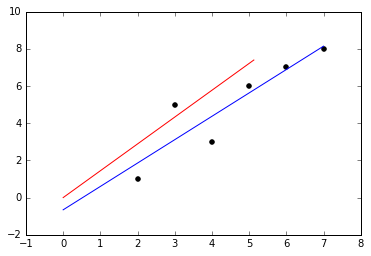

In [197]:
plt.scatter(x, y, color='black')
plt.plot(x_test, lr.predict(x_test), color='blue')
plt.plot(pca_line_x, pca_line_y, color='red')

In [193]:
pca_line

[array([ 0.,  0.]),
 array([ 0.56959484,  0.82192562]),
 array([ 1.13918968,  1.64385124]),
 array([ 1.70878451,  2.46577685]),
 array([ 2.27837935,  3.28770247]),
 array([ 2.84797419,  4.10962809]),
 array([ 3.41756903,  4.93155371]),
 array([ 3.98716386,  5.75347932]),
 array([ 4.5567587 ,  6.57540494]),
 array([ 5.12635354,  7.39733056])]

In [194]:
pca_line_x

5.1263535398634117

In [198]:
np.linalg.eig([[ 2.91666667,  3.66666667],
       [ 3.66666667,  5.66666667]])

(array([ 0.37566495,  8.20766839]), array([[-0.82192562, -0.56959484],
        [ 0.56959484, -0.82192562]]))

In [199]:
pca.components_

array([[ 0.56959484,  0.82192562],
       [ 0.82192562, -0.56959484]])

In [200]:
print(pca.explained_variance_ratio_)

[ 0.95623321  0.04376679]
